In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SongCSV.csv')

In [10]:
df

,SongNumber,SongID,AlbumID,AlbumName,ArtistID,ArtistLatitude,ArtistLocation,ArtistLongitude,ArtistName,Danceability,Duration,KeySignature,KeySignatureConfidence,Tempo,TimeSignature,TimeSignatureConfidence,Title,Year
0,1,b'SOGSMXL12A81C23D88',275907,b'Je Sais Que La Terre Est Plate (Deluxe)',b'AREJXK41187B9A4ACC',46.71067,b'France',1.71819,b'Rapha\xc3\xabl',0.0,148.74077,0,0.591,124.059,4,0.372,b'Je Sais Que La Terre Est Plate',2008
1,2,b'SOMBCOW12AAF3B229F',382807,b'Comme Vous',b'AR2XRFQ1187FB417FE',NaN,b'',NaN,b'Julie Zenatti',0.0,252.99546,1,0.429,80.084,4,0.533,b'On Efface',2004
2,3,b'SOEYIHF12AB017B5F4',490659,b'Watkins Ale - Music of the English Renaissa...,b'ARODOO01187FB44F4A',NaN,b'',NaN,b'The Baltimore Consort',0.0,78.02730,3,0.000,54.874,4,0.000,b'Howells Delight',0
3,4,b'SODJYEC12A8C13D757',116616,"bDon't Worry Lady""""",b'ARJGW911187FB586CA',NaN,b'',NaN,b'I Hate Sally',0.0,163.63057,7,0.380,77.150,3,0.369,b'Martha Served',2007
4,5,b'SOGSOUE12A58A76443',767122,b'Easy Listening: Cartoon Songs',b'AR9HQ6Y1187FB3C2CB',NaN,b'',NaN,b'Orlando Pops Orchestra',0.0,199.99302,10,0.551,120.382,4,1.000,b'Zip-A-Dee-Doo-Dah (Song of the South)',0
5,6,b'SOVVDCO12AB0187AF7',503347,b'X Communication : Trilogy II',b'ARDPTGD1187B9AD361',36.87652,b'Sikeston MO',-89.58828,b'Brand X',0.0,279.35302,9,0.519,99.024,4,1.000,b'Liquid Time (composition by John Goodsall)',0
6,7,b'SOKSZVC12A8C142004',239673,b'Karelian Isthmus',b'ARV8T9T1187B99F3F4',NaN,b'',NaN,b'Amorphis',0.0,255.03302,9,0.447,175.673,4,0.000,b'Misery Path (From the Privilege of Evil)',0
7,8,b'SORWTIF12A6D4FAA41',124304,b'Nobilt\xc3\xa0 di strada',b'ARJ5BEW1187FB52361',NaN,b'',NaN,b'Inoki',0.0,259.31710,1,0.194,87.999,4,0.954,b'Nuovi Re pt. I I (feat. Tek money - Lady Tam...,0
8,9,b'SOZQSGL12AF72A9145',181162,b'Milking The Sacred Cow',b'AR050VJ1187B9B13A7',NaN,b'',NaN,b'Dead Kennedys',0.0,216.84200,10,0.325,92.897,4,0.879,b'Halloween',1982
9,10,b'SOKRHNY12AB01837DB',337773,b'Novas Vos Trago',b'AR8KUS11187B98C991',NaN,b'',NaN,b'Brigada Victor Jara',0.0,312.99873,4,0.669,86.981,5,0.688,b'Parto em terras distantes',1998


In [6]:
df.shape

(10000, 18)

In [8]:
df.columns

Index(['SongNumber', 'SongID', 'AlbumID', 'AlbumName', 'ArtistID',
       'ArtistLatitude', 'ArtistLocation', 'ArtistLongitude', 'ArtistName',
       'Danceability', 'Duration', 'KeySignature', 'KeySignatureConfidence',
       'Tempo', 'TimeSignature', 'TimeSignatureConfidence', 'Title', 'Year'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

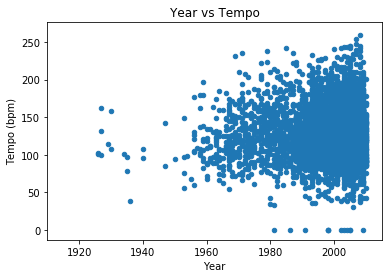

In [53]:
fig = plt.figure()
ax = df.plot.scatter(x = 'Year', y = "Tempo")
ax.set_xlim(1910, 2015)
ax.set_title("Year vs Tempo")
ax.set_ylabel("Tempo (bpm)")
# plt.savefig('year_vs_tempo.png')
plt.show()

In [63]:
years = list(set(df.Year))
del years[0]

In [86]:
mean_tempo = []
for i in range(len(years)):
    mean_tempo.append(df[(df.Year == years[i])].Tempo.mean())

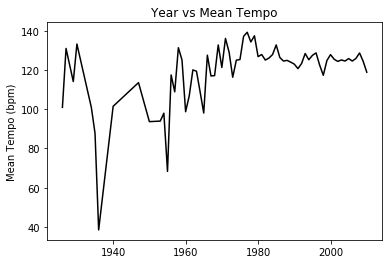

In [92]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(years, mean_tempo, '-k')
# ax.set_xlim(1910, 2015)
ax.set_title("Year vs Mean Tempo")
ax.set_ylabel("Mean Tempo (bpm)")
plt.savefig('year_vs_meantempo.png')
plt.show()

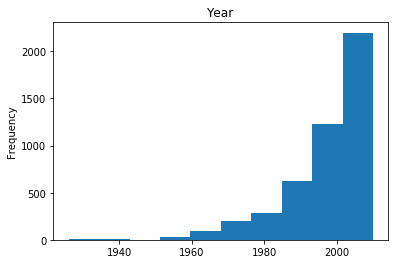

In [55]:
fig = plt.figure()
ax = df[df.Year != 0]['Year'].plot.hist(legend = None)
ax.set_title("Year")
plt.savefig('year_hist.png')
plt.show()